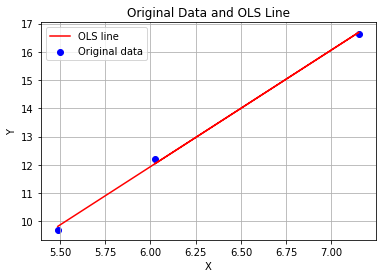

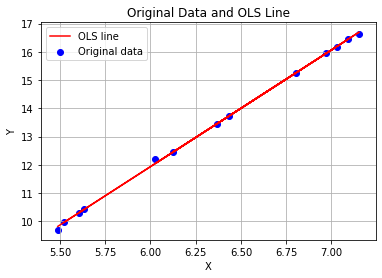

Original Regression:
Slope: 4.1300517777820565
Intercept: -12.846864830418962

Augmented Regression:
Slope: 4.130051777782057
Intercept: -12.84686483041896



In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to generate 2D point cloud
def generate_point_cloud(n):
    np.random.seed(0)  # For reproducibility
    x = np.random.uniform(0, 10, n)
    y = 2 * x + 1 + np.random.normal(0, 1, n)
    return x, y

# Function to perform ordinary least squares regression
def ols(x, y):
    slope, intercept, _, _, _ = linregress(x, y)
    return slope, intercept

# Function to plot data and regression line
def plot_data_and_line(x, y, slope, intercept):
    plt.scatter(x, y, color='blue', label='Original data')
    plt.plot(x, slope * x + intercept, color='red', label='OLS line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Data and OLS Line')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to add points on the regression line
def add_points_on_line(x, y, slope, intercept, n_points):
    x_new = np.random.uniform(min(x), max(x), n_points)  # Random x-values along the line
    y_new = slope * x_new + intercept
    return x_new, y_new

# Function to append the new points to the dataset
def append_points(x, y, x_new, y_new):
    x = np.concatenate((x, x_new))
    y = np.concatenate((y, y_new))
    return x, y

# Function to print regression statistics
def print_regression_stats(slope, intercept):
    print("Slope:", slope)
    print("Intercept:", intercept)
    print()

# Main function
def main():
    # Generate original point cloud
    x, y = generate_point_cloud(3)

    # Perform OLS on original data
    slope, intercept = ols(x, y)

    # Plot original data and regression line
    plot_data_and_line(x, y, slope, intercept)

    # Add points on the regression line
    x_new, y_new = add_points_on_line(x, y, slope, intercept, 10)

    # Append the new points to the dataset
    x, y = append_points(x, y, x_new, y_new)

    # Perform OLS on augmented data
    slope_new, intercept_new = ols(x, y)

    # Plot augmented data and new regression line
    plot_data_and_line(x, y, slope_new, intercept_new)

    # Print regression statistics for both regression lines
    print("Original Regression:")
    print_regression_stats(slope, intercept)
    print("Augmented Regression:")
    print_regression_stats(slope_new, intercept_new)

if __name__ == "__main__":
    main()


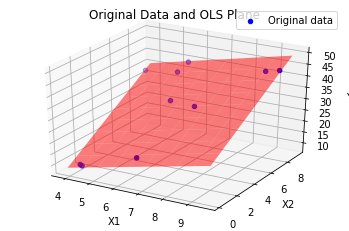

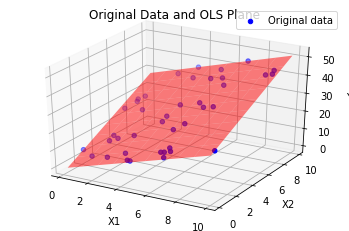

Original Regression:
Coefficients (beta): [2.38078648 2.9614916 ]
Intercept: -1.155363406562099

Augmented Regression:
Coefficients (beta): [2.38078648 2.9614916 ]
Intercept: -1.1553634065621154



In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

# Function to generate 3D point cloud
def generate_point_cloud(n):
    np.random.seed(0)  # For reproducibility
    x1 = np.random.uniform(0, 10, n)
    x2 = np.random.uniform(0, 10, n)
    y = 2 * x1 + 3 * x2 + 1 + np.random.normal(0, 1, n)
    return x1, x2, y

# Function to perform ordinary least squares regression
def ols(x, y):
    X = np.column_stack((np.ones(len(x)),x))
    beta = np.linalg.lstsq(X, y, rcond=None)
    return beta[0]

# Function to plot data and regression plane
def plot_data_and_plane(x1, x2, y, beta):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y, color='blue', label='Original data')

    # Create a meshgrid for the plane
    x1_mesh, x2_mesh = np.meshgrid(np.linspace(min(x1), max(x1), 10), np.linspace(min(x2), max(x2), 10))
    y_plane = beta[0] + x1_mesh * beta[1] + x2_mesh * beta[2]

    # Plot the plane
    ax.plot_surface(x1_mesh, x2_mesh, y_plane, alpha=0.5, color='red')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    plt.title('Original Data and OLS Plane')
    plt.legend()
    plt.show()

# Function to add points on the regression plane
def add_points_on_plane(x1, x2, y, beta, n_points):
    x1_new = np.random.uniform(0, 10, n_points)  # Random x1-values along the plane
    x2_new = np.random.uniform(0, 10, n_points)  # Random x2-values along the plane
    y_new = beta[0] + x1_new * beta[1] + x2_new * beta[2]
    return x1_new, x2_new, y_new

# Function to append the new points to the dataset
def append_points(x1, x2, y, x1_new, x2_new, y_new):
    x1_app = np.concatenate((x1, x1_new))
    x2_app = np.concatenate((x2, x2_new))
    y_app = np.concatenate((y, y_new))
    return x1_app, x2_app, y_app

# Function to print regression statistics
def print_regression_stats(beta):
    print("Coefficients (beta):", beta[1:])
    print("Intercept:", beta[0])
    print()

# Main function
def main():
    # Generate original point cloud
    x1, x2, y = generate_point_cloud(10)

    # Perform OLS on original data
    beta = ols(np.column_stack((x1, x2)), y)
    
    # Plot original data and regression plane
    plot_data_and_plane(x1, x2, y, beta)

    # Add points on the regression plane
    x1_new, x2_new, y_new = add_points_on_plane(x1, x2, y, beta, 30)

    # Append the new points to the dataset
    x1_app, x2_app, y_app = append_points(x1, x2, y, x1_new, x2_new, y_new)

    # Perform OLS on augmented data
    beta_app = ols(np.column_stack((x1_app, x2_app)), y_app)
    
    # Plot augmented data and new regression plane
    plot_data_and_plane(x1_app, x2_app, y_app, beta_app)

    # Print regression statistics for both regression planes
    print("Original Regression:")
    print_regression_stats(beta)
    print("Augmented Regression:")
    print_regression_stats(beta_app)

if __name__ == "__main__":
    main()
